In [266]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score


In [267]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Dataset/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Dataset


In [268]:
# loading the data from csv file to a pandas Dataframe
diabetes_dataset = pd.read_csv('diabetes.csv')

In [269]:
# printing the first 5 rows of the dataset
diabetes_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [270]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [271]:
dataset=diabetes_dataset
features = dataset.columns
cols = (dataset[features] == 0).sum()
# print(cols)

dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [272]:
dataset.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [273]:
# separating the data and labels
X = dataset.drop(columns = 'Outcome', axis=1)
Y = dataset['Outcome']

In [274]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, shuffle=False )

In [275]:
print(X.shape, X_train.shape, X_test.shape)
print(Y_train.value_counts())
print(Y_test.value_counts())

(768, 8) (614, 8) (154, 8)
0    401
1    213
Name: Outcome, dtype: int64
0    99
1    55
Name: Outcome, dtype: int64


##MLP classifier

In [276]:
from sklearn.neural_network import MLPClassifier
classifier=MLPClassifier()
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


accuracy_value= training_data_accuracy*100
precision_value = precision_score(Y_train, X_train_prediction)*100
recall_value = recall_score(Y_train, X_train_prediction)*100
f1_score_value = f1_score(Y_train, X_train_prediction)*100

accuracy_value1= test_data_accuracy*100
precision_value1 = precision_score(Y_test, X_test_prediction)*100
recall_value1 = recall_score(Y_test, X_test_prediction)*100
f1_score_value1 = f1_score(Y_test, X_test_prediction)*100

print('Train Accuracy =',accuracy_value,'%')
print('Train Precision =',precision_value,'%')
print('Train Recall =',recall_value,'%')
print('Train F1 Score =',f1_score_value,'%')
print('....................................')
print('....................................')
print('Test Accuracy =',accuracy_value1,'%')
print('Test Precision =',precision_value1,'%')
print('Test Recall =',recall_value1,'%')
print('Test F1 Score =',f1_score_value1,'%')

Train Accuracy = 70.68403908794788 %
Train Precision = 69.87951807228916 %
Train Recall = 27.230046948356808 %
Train F1 Score = 39.189189189189186 %
....................................
....................................
Test Accuracy = 68.18181818181817 %
Test Precision = 71.42857142857143 %
Test Recall = 18.181818181818183 %
Test F1 Score = 28.98550724637682 %


In [277]:
# print(plot_confusion_matrix(classifier, X_train, Y_train, cmap=plt.cm.Blues))
# print("Confusion Matrix with Train Data")

In [278]:
# print(plot_confusion_matrix(classifier, X_test, Y_test, display_labels="DN", cmap=plt.cm.Blues))
# print("Confusion Matrix with Train Data")


##Perceptron classifier

In [279]:
# from sklearn.linear_model import Perceptron
# classifier=Perceptron(alpha=0.0001)
# classifier.fit(X_train, Y_train)

# # accuracy score on the training data
# X_train_prediction = classifier.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


# # accuracy score on the test data
# X_test_prediction = classifier.predict(X_test)
# test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


# accuracy_value= training_data_accuracy*100
# precision_value = precision_score(Y_train, X_train_prediction)*100
# recall_value = recall_score(Y_train, X_train_prediction)*100
# f1_score_value = f1_score(Y_train, X_train_prediction)*100

# accuracy_value1= test_data_accuracy*100
# precision_value1 = precision_score(Y_test, X_test_prediction)*100
# recall_value1 = recall_score(Y_test, X_test_prediction)*100
# f1_score_value1 = f1_score(Y_test, X_test_prediction)*100

# print('Train Accuracy =',accuracy_value,'%')
# print('Train Precision =',precision_value,'%')
# print('Train Recall =',recall_value,'%')
# print('Train F1 Score =',f1_score_value,'%')
# print('....................................')
# print('....................................')
# print('Test Accuracy =',accuracy_value1,'%')
# print('Test Precision =',precision_value1,'%')
# print('Test Recall =',recall_value1,'%')
# print('Test F1 Score =',f1_score_value1,'%')

##Random Forest classifier

In [280]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction = rf_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


# accuracy score on the test data
X_test_prediction = rf_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

accuracy_value= training_data_accuracy*100
precision_value = precision_score(Y_train, X_train_prediction)*100
recall_value = recall_score(Y_train, X_train_prediction)*100
f1_score_value = f1_score(Y_train, X_train_prediction)*100

accuracy_value1= test_data_accuracy*100
precision_value1 = precision_score(Y_test, X_test_prediction)*100
recall_value1 = recall_score(Y_test, X_test_prediction)*100
f1_score_value1 = f1_score(Y_test, X_test_prediction)*100

print('Train Accuracy =',accuracy_value,'%')
print('Train Precision =',precision_value,'%')
print('Train Recall =',recall_value,'%')
print('Train F1 Score =',f1_score_value,'%')
print('....................................')
print('....................................')
print('Test Accuracy =',accuracy_value1,'%')
print('Test Precision =',precision_value1,'%')
print('Test Recall =',recall_value1,'%')
print('Test F1 Score =',f1_score_value1,'%')

Train Accuracy = 100.0 %
Train Precision = 100.0 %
Train Recall = 100.0 %
Train F1 Score = 100.0 %
....................................
....................................
Test Accuracy = 75.32467532467533 %
Test Precision = 69.76744186046511 %
Test Recall = 54.54545454545454 %
Test F1 Score = 61.224489795918366 %


In [281]:
import pickle
pickle_out=open("RandomForestClassifier.pkl","wb")
pickle.dump(rf_classifier,pickle_out)
pickle_out.close()

##Logistic Regression classifier

In [284]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


accuracy_value= training_data_accuracy*100
precision_value = precision_score(Y_train, X_train_prediction)*100
recall_value = recall_score(Y_train, X_train_prediction)*100
f1_score_value = f1_score(Y_train, X_train_prediction)*100

accuracy_value1= test_data_accuracy*100
precision_value1 = precision_score(Y_test, X_test_prediction)*100
recall_value1 = recall_score(Y_test, X_test_prediction)*100
f1_score_value1 = f1_score(Y_test, X_test_prediction)*100

print('Train Accuracy =',accuracy_value,'%')
print('Train Precision =',precision_value,'%')
print('Train Recall =',recall_value,'%')
print('Train F1 Score =',f1_score_value,'%')
print('....................................')
print('....................................')
print('Test Accuracy =',accuracy_value1,'%')
print('Test Precision =',precision_value1,'%')
print('Test Recall =',recall_value1,'%')
print('Test F1 Score =',f1_score_value1,'%')


Train Accuracy = 79.31596091205212 %
Train Precision = 75.0 %
Train Recall = 60.56338028169014 %
Train F1 Score = 67.012987012987 %
....................................
....................................
Test Accuracy = 75.32467532467533 %
Test Precision = 71.7948717948718 %
Test Recall = 50.90909090909091 %
Test F1 Score = 59.57446808510638 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


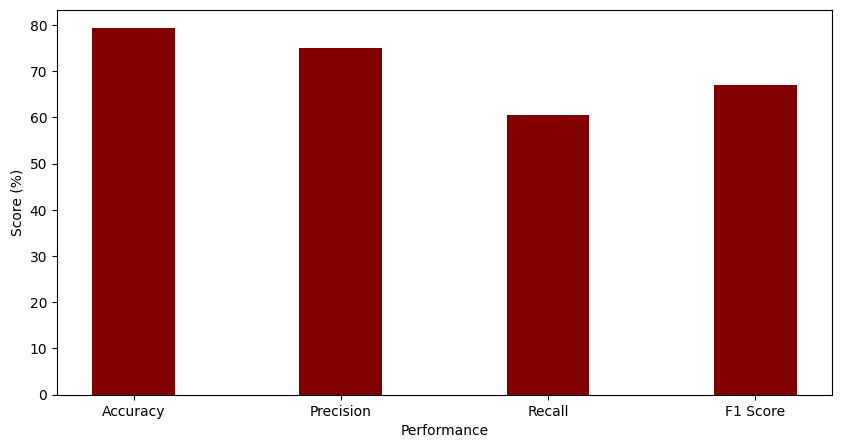

In [285]:
data = {'Accuracy':accuracy_value, 'Precision':precision_value, 'Recall':recall_value,
        'F1 Score':f1_score_value}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.xlabel("Performance")
plt.ylabel("Score (%)")
plt.show()

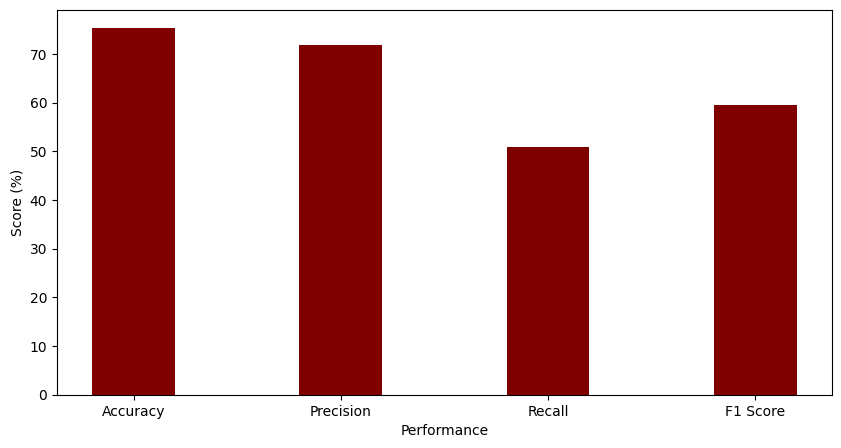

In [286]:
data = {'Accuracy':accuracy_value1, 'Precision':precision_value1, 'Recall':recall_value1,
        'F1 Score':f1_score_value1}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.xlabel("Performance")
plt.ylabel("Score (%)")
plt.show()

In [287]:
print(Y_train.value_counts())
print(Y_test.value_counts())

0    401
1    213
Name: Outcome, dtype: int64
0    99
1    55
Name: Outcome, dtype: int64


In [288]:
# print(plot_confusion_matrix(classifier, X_train, Y_train, display_labels="DN", cmap=plt.cm.Blues))
# # print("Confusion Matrix with Train Data")

In [289]:
# print(plot_confusion_matrix(classifier, X_test, Y_test, display_labels="DN", cmap=plt.cm.Blues))
# print("Confusion Matrix with Train Data")

##SVM classifier

In [290]:
# classifier = svm.SVC(kernel='rbf')
# #training the support vector Machine Classifier
# classifier.fit(X_train, Y_train)

# # accuracy score on the training data
# X_train_prediction = classifier.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# # accuracy score on the test data
# X_test_prediction = classifier.predict(X_test)
# test_data_accuracy = accuracy_score(X_test_prediction, Y_test)



# accuracy_value= training_data_accuracy*100
# precision_value = precision_score(Y_train, X_train_prediction)*100
# recall_value = recall_score(Y_train, X_train_prediction)*100
# f1_score_value = f1_score(Y_train, X_train_prediction)*100

# accuracy_value1= test_data_accuracy*100
# precision_value1 = precision_score(Y_test, X_test_prediction)*100
# recall_value1 = recall_score(Y_test, X_test_prediction)*100
# f1_score_value1 = f1_score(Y_test, X_test_prediction)*100

# print('Train Accuracy =',accuracy_value,'%')
# print('Train Precision =',precision_value,'%')
# print('Train Recall =',recall_value,'%')
# print('Train F1 Score =',f1_score_value,'%')
# print('....................................')
# print('....................................')
# print('Test Accuracy =',accuracy_value1,'%')
# print('Test Precision =',precision_value1,'%')
# print('Test Recall =',recall_value1,'%')
# print('Test F1 Score =',f1_score_value1,'%')
